In [48]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.core.interactiveshell import InteractiveShell

warnings.filterwarnings("ignore")

In [4]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [5]:
test_in = pd.read_csv('Database/test_pre_input.csv', index_col=0)
test_out = pd.read_csv('Database/test_pre_output.csv', index_col=0)

In [6]:
i = 5
name_list = ['None', 'SMOTE', 'ADASYN', 'KMeanSMOTE', 'SMOTE_all', 'KMeanSMOTE_all']
best_dt = joblib.load(f'Files/dt_{name_list[i]}_model.pkl')
best_lgb = joblib.load(f'Files/lgb_{name_list[i]}_model.pkl')
best_xgb = joblib.load(f'Files/xgb_{name_list[i]}_model.pkl')
best_cat = joblib.load(f'Files/cat_{name_list[i]}_model.pkl')

In [7]:
proba1 = best_dt.predict_proba(test_in)
proba2 = best_lgb.predict_proba(test_in)
proba3 = best_xgb.predict_proba(test_in)
proba4 = best_cat.predict_proba(test_in)
average_proba = (proba1 + proba2 + proba3 + proba4) / 4

dt_result = np.argmax(proba1, axis=1)
lgb_result = np.argmax(proba2, axis=1)
xgb_result = np.argmax(proba3, axis=1)
cat_result = np.argmax(proba4, axis=1)
soft_voting_result = np.argmax(average_proba, axis=1)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [8]:
metric_df = pd.DataFrame(columns=['DT', 'LGBM', 'XGB', 'CAT', 'Soft Voting'],
                         index=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'AUC'])

In [9]:
metric_df.loc['Accuracy', 'DT'] = f"{accuracy_score(test_out, dt_result):.5f}"
metric_df.loc['Recall', 'DT'] = f"{recall_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'DT'] = f"{precision_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'DT'] = f"{f1_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'DT'] = f"{roc_auc_score(test_out, proba1, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'LGBM'] = f"{accuracy_score(test_out, lgb_result):.5f}"
metric_df.loc['Recall', 'LGBM'] = f"{recall_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'LGBM'] = f"{precision_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'LGBM'] = f"{f1_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'LGBM'] = f"{roc_auc_score(test_out, proba2, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'XGB'] = f"{accuracy_score(test_out, xgb_result):.5f}"
metric_df.loc['Recall', 'XGB'] = f"{recall_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'XGB'] = f"{precision_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'XGB'] = f"{f1_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'XGB'] = f"{roc_auc_score(test_out, proba3, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'CAT'] = f"{accuracy_score(test_out, cat_result):.5f}"
metric_df.loc['Recall', 'CAT'] = f"{recall_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'CAT'] = f"{precision_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'CAT'] = f"{f1_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'CAT'] = f"{roc_auc_score(test_out, proba4, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'Soft Voting'] = f"{accuracy_score(test_out, soft_voting_result):.5f}"
metric_df.loc['Recall', 'Soft Voting'] = f"{recall_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'Soft Voting'] = f"{precision_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'Soft Voting'] = f"{f1_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc[
    'AUC', 'Soft Voting'] = f"{roc_auc_score(test_out, average_proba, multi_class='ovr', average='weighted'):.5f}"

In [103]:
metric_df.to_csv(f'Files/metric_{name_list[i]}.csv')

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importance Comparison')

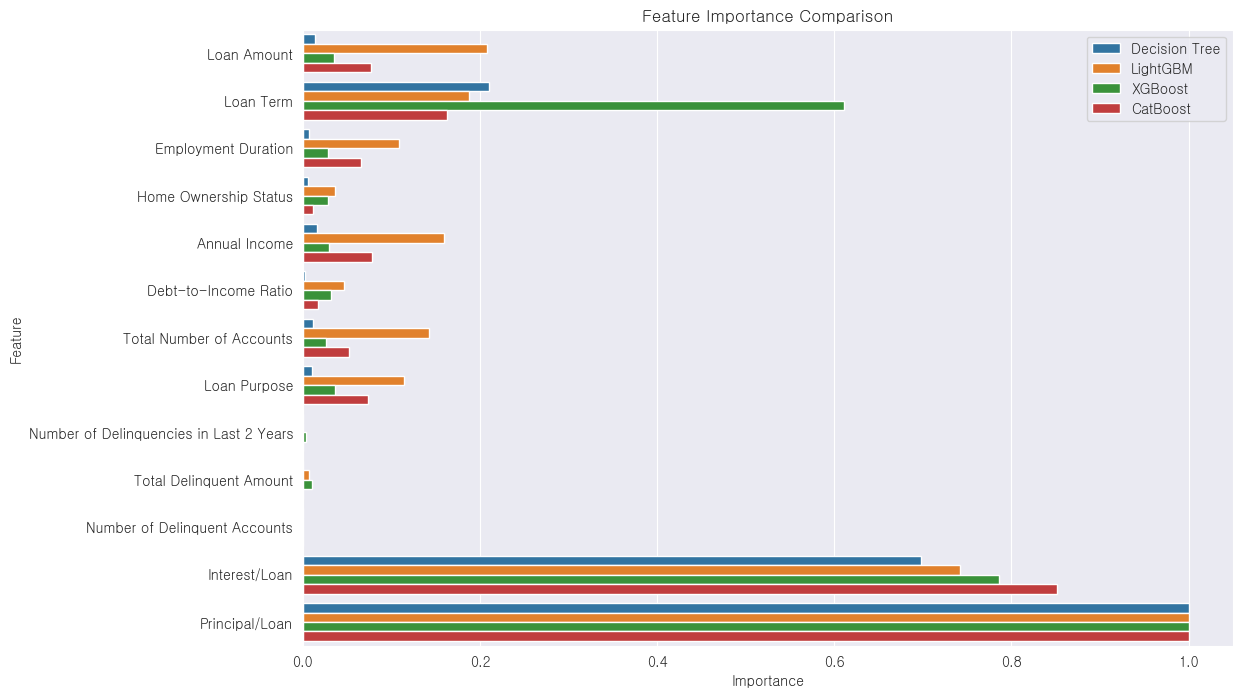

In [10]:
# 특성 중요도 추출
dt_importances = best_dt.feature_importances_
lgb_importances = best_lgb.feature_importances_
xgb_importances = best_xgb.feature_importances_
cat_importances = best_cat.get_feature_importance()

# 특성 중요도를 데이터프레임으로 정리
features = test_in.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree': dt_importances,
    'LightGBM': lgb_importances,
    'XGBoost': xgb_importances,
    'CatBoost': cat_importances
})

model_list = ['Decision Tree', 'LightGBM', 'XGBoost', 'CatBoost']

scaler = MinMaxScaler()
importnce_values = scaler.fit_transform(importance_df[model_list].values)

scaled_importance_df = pd.DataFrame(data=importnce_values, columns=model_list)
scaled_importance_df = pd.concat([importance_df['Feature'], scaled_importance_df], axis=1)
column_mapping = {
    '대출기간': 'Loan Term',
    '주택소유상태': 'Home Ownership Status',
    '대출목적': 'Loan Purpose',
    '최근_2년간_연체_횟수': 'Number of Delinquencies in Last 2 Years',
    '연체계좌수': 'Number of Delinquent Accounts',
    '총연체금액': 'Total Delinquent Amount',
    '부채_대비_소득_비율': 'Debt-to-Income Ratio',
    '대출금액': 'Loan Amount',
    '연간소득': 'Annual Income',
    '총계좌수': 'Total Number of Accounts',
    '근로기간': 'Employment Duration',
    '이자/대출': 'Interest/Loan',
    '원금/대출': 'Principal/Loan'
}

scaled_importance_df['Feature'] = scaled_importance_df['Feature'].map(column_mapping)

scaled_importance_df = scaled_importance_df.melt(id_vars=['Feature'], var_name='Model',
                                                 value_name='Importance')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=scaled_importance_df, x='Importance', y='Feature', hue='Model')
plt.title('Feature Importance Comparison')
plt.legend(loc='upper right')
plt.show()

In [11]:
import numpy as np


def nearest_neighbour(X, x, K):
    euclidean = np.ones(X.shape[0] - 1)
    k = 0
    for j in range(0, X.shape[0]):
        if np.array_equal(X[j], x) == False:
            euclidean[k] = np.sqrt(sum((X[j] - x) ** 2))
            k = k + 1
    indices = list(sorted(range(len(euclidean)), key=lambda j: euclidean[j]))
    difference = []
    for j in range(0, K):
        difference.append((abs(x - X[indices[j]])))
    weight = np.random.random()
    while (weight == 0):
        weight = np.random.random()
    additive = np.multiply(difference, weight)
    return additive


def SMOTE(X, K):
    K = int(K / 100)
    new = [None] * (K * X.shape[0] * X.shape[1])
    new = np.array(new).reshape(K * X.shape[0], X.shape[1])
    k = 0
    for i in range(0, X.shape[0]):
        additive = nearest_neighbour(X, X[i], K)
        for j in range(0, K):
            new[k] = X[i] + additive[j]
            k = k + 1
    return new


In [20]:
import numpy as np


def nearest_neighbour(X, x, K, features):
    X_selected = X[:, features]
    x_selected = x[features]

    euclidean = np.ones(X_selected.shape[0] - 1)
    k = 0
    for j in range(X_selected.shape[0]):
        if not np.array_equal(X_selected[j], x_selected):
            euclidean[k] = np.sqrt(np.sum((X_selected[j] - x_selected) ** 2))
            k += 1
    indices = list(sorted(range(len(euclidean)), key=lambda j: euclidean[j]))
    difference = []
    for j in range(K):
        difference.append(np.abs(x_selected - X_selected[indices[j]]))
    weight = np.random.random()
    while weight == 0:
        weight = np.random.random()
    additive = np.multiply(difference, weight)
    return additive


def SMOTE(X, K, features):
    K = int(K / 100)
    new = np.empty((K * X.shape[0], X.shape[1]))
    k = 0
    for i in range(X.shape[0]):
        additive = nearest_neighbour(X, X[i], K, features)
        for j in range(K):
            new[k] = X[i] + additive[j]
            k += 1
    return new

In [33]:
def nearest_neighbour(X, x, K, features):
    X_selected = X[:, features]
    x_selected = x[features]

    distances = np.linalg.norm(X_selected - x_selected, axis=1)
    indices = np.argsort(distances)[1:K + 1]  # 자기 자신 제외하고 가장 가까운 K개의 이웃 선택

    differences = X_selected[indices] - x_selected
    weights = np.random.random((K, 1))
    additive = differences * weights
    return additive


def generate_new_samples(row, X, K, features):
    additive = nearest_neighbour(X, row, K, features)
    new_samples = np.array([row for _ in range(K)])  # 원본 샘플을 복사하여 K번 반복
    new_samples[:, features] += additive  # 선택된 변수들에 대해 additive 적용
    return new_samples


def SMOTE(X, K, features):
    X_df = pd.DataFrame(X)

    # Apply 함수를 사용하여 각 행(row)에 대해 새로운 샘플을 생성
    new_samples_list = X_df.apply(lambda row: generate_new_samples(row.values, X, K, features), axis=1)

    # 생성된 새로운 샘플들을 하나의 배열로 결합
    new_samples = np.vstack(new_samples_list.values)

    return new_samples


# 예제 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 5)  # 100개의 샘플과 5개의 특성
K = 2
features = [0, 2, 4]  # 첫 번째, 세 번째, 다섯 번째 변수만 고려

# SMOTE 적용
new_samples = SMOTE(X, K, features)

print("Original samples shape:", X.shape)
print("New samples shape:", new_samples.shape)

Original samples shape: (100, 5)
New samples shape: (200, 5)


In [47]:
import numpy as np
import pandas as pd



class SMOTE:
    def __init__(self, X, y, ratio, K, features):
        self.X = X
        self.y = y
        self.ratio = ratio
        self.K = K
        self.features = features

    def nearest_neighbour(self, X, x, K, features):
        X_selected = X[:, features]
        x_selected = x[features]

        distances = np.linalg.norm(X_selected - x_selected, axis=1)
        indices = np.argsort(distances)[1:K + 1]

        differences = X_selected[indices] - x_selected
        weights = np.random.random((K, 1))
        additive = differences * weights
        return additive

    def generate_new_samples(self, row, X, K, features):
        row = row.values
        additive = self.nearest_neighbour(X, row, K, features)
        new_samples = np.tile(row, (K, 1))
        new_samples[:, features] += additive
        return new_samples

    def SMOTE(self, X, y, K, features):
        X_df = pd.DataFrame(X)
        minority_class = min(Counter(y), key=Counter(y).get)
        X_minority = X_df[y == minority_class]

        new_samples_list = X_minority.apply(lambda row: self.generate_new_samples(row, X, K, features), axis=1)
        new_samples = np.vstack(new_samples_list)

        new_X = np.vstack([X, new_samples])
        new_y = np.hstack([y, np.array([minority_class] * len(new_samples))])

        return new_X, new_y

    def balance_classes(self):
        if self.features is None:
            self.features = list(range(self.X.shape[1]))

        class_counts = Counter(self.y)
        minority_class = min(class_counts, key=class_counts.get)

        while class_counts[minority_class] / len(self.y) < self.ratio:
            X, y = self.SMOTE(self.X, self.y, self.K, self.features)
            class_counts = Counter(y)
            minority_class = min(class_counts, key=class_counts.get)

        return X, y


# SMOTE 적용
features = [0, 1, 2, 3, 4, 5, 6, 7, 11, 12]
S = SMOTE(test_in, test_out, 0.1, 2, features)
X_balanced, y_balanced = S.balance_classes()

print("Original class distribution:", Counter(y))
print("New class distribution:", Counter(y_balanced))

InvalidIndexError: (slice(None, None, None), [0, 1, 2, 3, 4, 5, 6, 7, 11, 12])